In [ ]:
file_path = 'train.txt'

def is_ukrainian_percentage(line, threshold=0.70):
    ukrainian_chars = [char for char in line if 'а' <= char <= 'я' or char == 'і' or char == 'ї' or char == 'є' or char == 'ґ']
    ukrainian_percentage = len(ukrainian_chars) / len(line)
    return ukrainian_percentage > threshold

lines_array = []

with open(file_path, 'r', encoding='utf-8') as file:
    lines_array = [
        line.strip().replace("'", "").replace("’", "")
        for line in file.readlines()
        if is_ukrainian_percentage(line) and len(line) > 100
    ]

print(lines_array[:10])


['Обєкт дослідження: дослідження розробки веб-сервісів для публічних опитувань. Обєктом розробки є веб-сервіс для публічних опитувань та аналізу статистики, використовуючи бібліотеку ASP.NET Core для серверної частини та Razor Pages для клієнтської частини.', 'Мета роботи: ознайомлення зі сферою розробки веб-сервісів для публічних опитувань, аналіз сучасних технологій веб-розробки, розробка прототипу веб-сервіса для публічних опитувань та аналізу статистики.', 'Результати роботи: був проведений аналіз популярних існуючих на ринку сервісів для вирішення поставленої задачі. Були розглянуті сучасні методи та інструменти для розробки веб-сервісів, а також їх переваги та особливості. На основі розглянутої інформації був розроблений веб-сервіс для публічних опитувань та аналізу статистики.', 'Сфера застосування: веб-сервіс може використовуватись у повсякденному житті, а також для комерційного застосування у сферах, що потребують інструмент для проведення публічних опитувань.', 'Значимість ро

In [ ]:
print(len(lines_array))

63464


In [ ]:
print(lines_array[923])

Visual Studio також має і безліч інших функцій: можливість управління проектом, вбудована функція управління вихідним кодом, можливість рефакторизації коду, потужна модель розширюваності. Більш того, в разі використання Visual Studio розробник отримує розширені можливості для модульного тестування, спільної роботи і управління версіями коду.


In [ ]:
!pip install bertopic
!pip install --upgrade transformers sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.2
    Uninstalling transformers-4.46.2:
      Successfully uninstalled transformers-4.46.2
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.2.1
    Uninstalling sentence-transformers-3.2.1:
      Successfully uninstalled sentence-transformers-3.2.1


In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

topic_model = BERTopic(language = "multilingual",
                       embedding_model="intfloat/multilingual-e5-small",
                       min_topic_size=70)
topics, probs = topic_model.fit_transform(lines_array)

modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/498k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

In [ ]:
freq = topic_model.get_topic_info()
freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,32302,-1_та_для_на_що,"[та, для, на, що, даних, до, за, не, як, це]",[Для цієї задачі було вирішено використовувати...
1,0,4073,0_гри_3d_ігор_гравця,"[гри, 3d, ігор, гравця, ігрових, ігрового, та,...",[Ідея системи адаптації ігрового світу до дій ...
2,1,2144,1_блокчейн_транзакції_блокчейну_транзакцій,"[блокчейн, транзакції, блокчейну, транзакцій, ...",[Блокчейн широко використовується для реалізац...
3,2,1696,2_користувач_сторінку_рисунок_рис,"[користувач, сторінку, рисунок, рис, кнопку, с...",[Після реєстрації користувачу поступово відкри...
4,3,1148,3_підпису_ключів_ключ_ключа,"[підпису, ключів, ключ, ключа, шифрування, циф...",[Використання асиметричної криптографії дозвол...
...,...,...,...,...,...
106,105,81,105_svm_опорних_векторів_гіперплощину,"[svm, опорних, векторів, гіперплощину, класифі...",[SVM - це метод навчання з учителем і ефективн...
107,106,80,106_net_asp_core_веб,"[net, asp, core, веб, nuget, фреймворк, додатк...",[ASP.NET Core – це відкритий вебфреймворк для ...
108,107,75,107_кафедри_засіданні_заслухана_рекомендована,"[кафедри, засіданні, заслухана, рекомендована,...",[Робота заслухана на засіданні кафедри дослідж...
109,108,74,108_напруги_струму_струм_опір,"[напруги, струму, струм, опір, резисторів, мат...",[Дві досить корисні схеми в електроніці - це т...


In [ ]:
freq.head(50)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,32302,-1_та_для_на_що,"[та, для, на, що, даних, до, за, не, як, це]",[Для цієї задачі було вирішено використовувати...
1,0,4073,0_гри_3d_ігор_гравця,"[гри, 3d, ігор, гравця, ігрових, ігрового, та,...",[Ідея системи адаптації ігрового світу до дій ...
2,1,2144,1_блокчейн_транзакції_блокчейну_транзакцій,"[блокчейн, транзакції, блокчейну, транзакцій, ...",[Блокчейн широко використовується для реалізац...
3,2,1696,2_користувач_сторінку_рисунок_рис,"[користувач, сторінку, рисунок, рис, кнопку, с...",[Після реєстрації користувачу поступово відкри...
4,3,1148,3_підпису_ключів_ключ_ключа,"[підпису, ключів, ключ, ключа, шифрування, циф...",[Використання асиметричної криптографії дозвол...
5,4,785,4_бота_telegram_чат_бот,"[бота, telegram, чат, бот, телеграм, ботів, бо...",[При використанні нашого чат-бота користувач б...
6,5,751,5_тексту_слів_слова_мови,"[тексту, слів, слова, мови, текстів, природної...",[Обєктом дослідження є тональність написаного ...
7,6,647,6_студентів_навчання_освіти_онлайн,"[студентів, навчання, освіти, онлайн, навчальн...","[Можна стверджувати, що технології адаптивного..."
8,7,595,7_рівняння_доведення_значення_функції,"[рівняння, доведення, значення, функції, задач...","[Твердження 1.3 Припустимо, що послідовність в..."
9,8,572,8_активації_нейронів_шару_мережі,"[активації, нейронів, шару, мережі, шар, нейро...","[Кожен нейрон мережі отримує вхідні сигнали, о..."


In [ ]:
freq.tail(50)

,Topic,Count,Name,Representation,Representative_Docs
61,60,134,60_moodle_classroom_google_canvas,"[moodle, classroom, google, canvas, edmodo, sc...",[надають значно більші функціональні можливост...
62,61,132,61_життя_здоровя_емоції_харчування,"[життя, здоровя, емоції, харчування, населення...",[Застосунок «Eat&Fit» повинен відслідковувати ...
63,62,127,62_aws_хмарних_amazon_хмарні,"[aws, хмарних, amazon, хмарні, хмара, cloud, х...",[Обчислювальний хмара Amazon Elastic Compute C...
64,63,126,63_docker_контейнери_контейнерів_kubernetes,"[docker, контейнери, контейнерів, kubernetes, ...",[Docker – це програмна платформа для швидкої р...
65,64,126,64_розроблено_веб_роботи_розробки,"[розроблено, веб, роботи, розробки, проаналізо...",[Під час розробки дипломного проєкту було досл...
66,65,125,65_портфеля_ризику_прибутковості_прибутковість,"[портфеля, ризику, прибутковості, прибутковіст...",[Задача вибору оптимального портфеля є однією ...
67,66,125,66_пацієнтів_ліжок_відмови_палаті,"[пацієнтів, ліжок, відмови, палаті, палати, пе...",[відмови може суттєво збільшитися приблизно у ...
68,67,124,67_атомів_молекули_атоми_молекул,"[атомів, молекули, атоми, молекул, атомами, фо...",[Молекулою називають електрично нейтральну гру...
69,68,124,68_angular_фреймворк_компонентів_фреймворку,"[angular, фреймворк, компонентів, фреймворку, ...",[Angular. Angular – це веб-фреймворк для створ...
70,69,122,69_екг_серця_сигналу_кардіограми,"[екг, серця, сигналу, кардіограми, серцевих, ш...",[Сигнали ЕКГ вимагають різних методів обробки ...


In [ ]:
num = 25

In [ ]:
print(topic_model.get_topic(num))

[('зомбі', 0.04553172748213312), ('ланчестера', 0.026597984983608415), ('війни', 0.024038653977927104), ('артилерії', 0.023370081349198844), ('бойових', 0.01708492221038623), ('військ', 0.016926751984240884), ('моделі', 0.01526901178987311), ('озброєнь', 0.01473176778091081), ('військових', 0.012095247347287197), ('чисельності', 0.011893148928186744)]


In [ ]:
topic_model.get_representative_docs(num)

['для представлення як фіктивних ситуацій, так і реальних. Воно також продемонструвало розвиток математичного моделювання від простих рівнянь, які використовувалися в моделях Ланчестера, до складних взаємозвязків між різними популяціями в зомбі-апокаліпсисі. Моделі Ланчестера були створені, коли авіаційна війна стала популярною і базувалися на простих диференціальних рівняннях, які можна було розвязати вручну. Моделі зомбі були більш новішими і використовували складні диференціальні рівняння, для розвязання яких потрібно було програмування на компютері. Порівняли базову та складну модель кожного типу моделі, а потім співставили загальні теми моделей Ланчестера та зомбі. Модель без прицільного обстрілу та модель SZR є базовими моделями, відповідно, тоді як модель зі спрямованим вогнем та модель SIZR є складнішими. Більш складні моделі включають додаткові змінні, що дозволяли більші можливості моделювання.',
 'популяціями у зомбі-математичних моделях. Ромеро також ініціював класичний спо

In [ ]:
topic_model.visualize_hierarchy()

In [ ]:
topic_model.visualize_barchart(top_n_topics=20, n_words = 15)

In [ ]:
import random

def process_text_by_number(texts, model, num):
        text = texts[num]
        print(text)
        topics = model.find_topics(text)

        for num_topic in topics[0]:
            print(model.get_topic(num_topic))
        print()

nums = [random.randint(0, 63464) for _ in range(20)]
for num in nums:
    process_text_by_number(lines_array, topic_model, num)

для методу спряжених напрямків для квадратичної функції найкраще використовувати модифікацію методу для квадратичних функцій
[('рівняння', 0.018373610519409313), ('доведення', 0.012828195183304815), ('значення', 0.012538749229238385), ('функції', 0.012175785564499195), ('задачі', 0.011740743864635172), ('що', 0.011379499119239857), ('розвязок', 0.011365866552992368), ('розподіл', 0.011232666488840878), ('теорема', 0.011013811304915123), ('випадкових', 0.010828490347109409)]
[('втрат', 0.05664336800543696), ('спуску', 0.0326948798576605), ('градієнтного', 0.029806017547446623), ('спуск', 0.024240466330052005), ('функції', 0.023344476021834017), ('градієнтний', 0.023335409466791072), ('функція', 0.020868246678960728), ('навчання', 0.019935869179691743), ('оптимізації', 0.016744933240295867), ('градієнт', 0.01619019669085425)]
[('та', 0.007566161362185028), ('для', 0.007516235732199733), ('на', 0.007158032679492669), ('що', 0.00683679925447219), ('даних', 0.0061422757106055345), ('до', 0.

In [ ]:
nums_texts = [random.randint(0, 63464) for _ in range(50)]

In [ ]:
import random

def find_similar_text(texts, model, num):
        text = texts[num]
        print(text)
        topics = model.find_topics(text)
        print("similar: " + topic_model.get_representative_docs(topics[0][0])[0])
        print()
        return topic_model.get_representative_docs(topics[0][0])[0]

for num in nums_texts:
    find_similar_text(lines_array, topic_model, num)

Практичне значення одержаних результатів: спроєктований та розроблений застосунок спрощує пошук потрібного документу, надає можливість його відредагувати, дає досить широкий функціонал для роботи з ним та багатокористувацький доступ. Також є можливість експорту вибраного документу та генерації аналітичних звітів за ним.
similar: Під час розробки дипломного проєкту було досліджено існуючі на ринку застосунки, виявлено їх переваги і недоліки, розроблено загальну концепцію програми, поставлено задачу, проведено аналіз обєкту програмування та визначено вимоги до апаратного та програмного забезпечення. Були спроєктовані шаблони документів для застосунку, розроблений інтерфейс та дизайн застосунку, призначеного для роботи зі звітною документацією підприємства торгово-промислової групи. Також розроблено сам програмний продукт та створено інструкції до нього.

Географічна сегментація. Вона базується на розподілі споживачів за їхнім географічним розташуванням, таким як країни, регіони, міста то

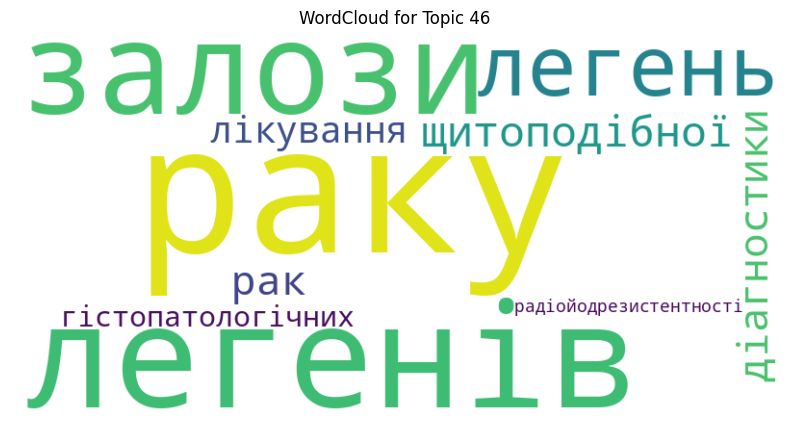

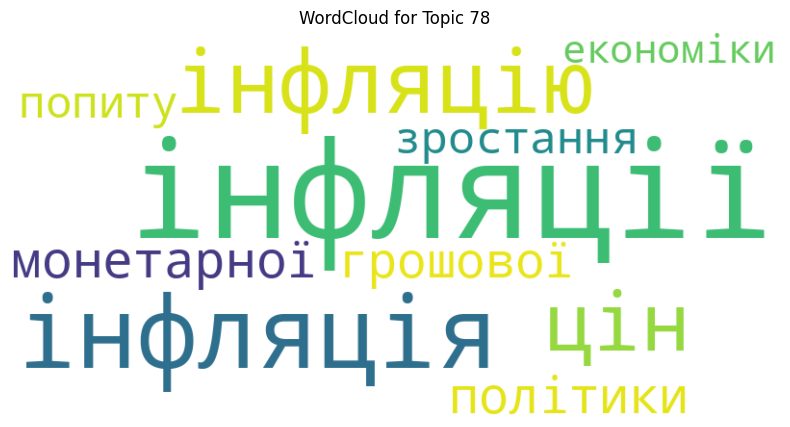

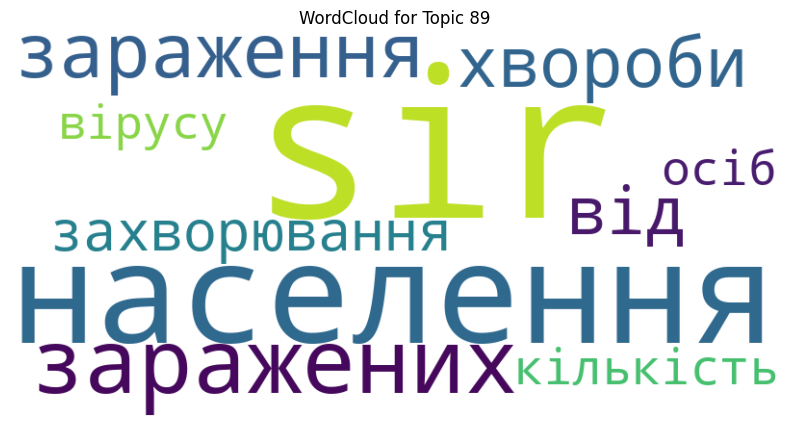

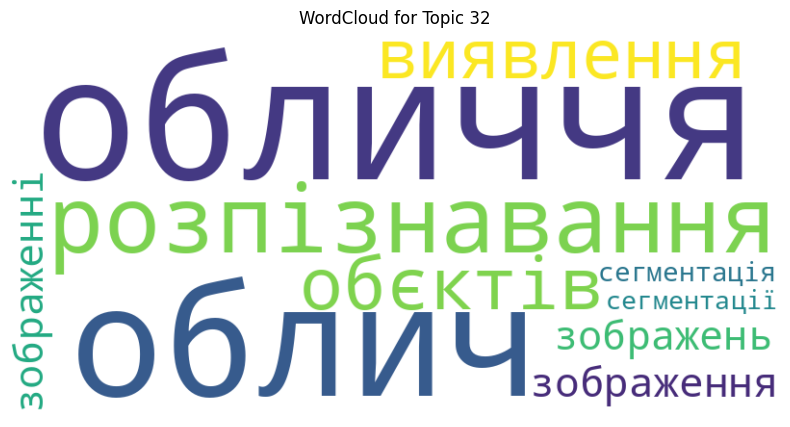

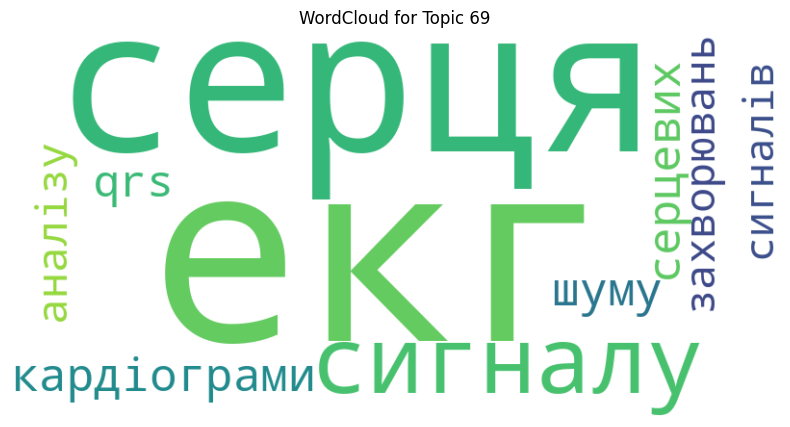

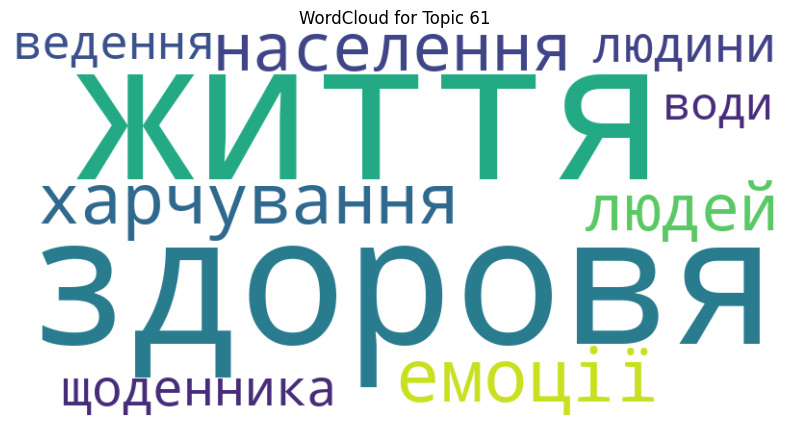

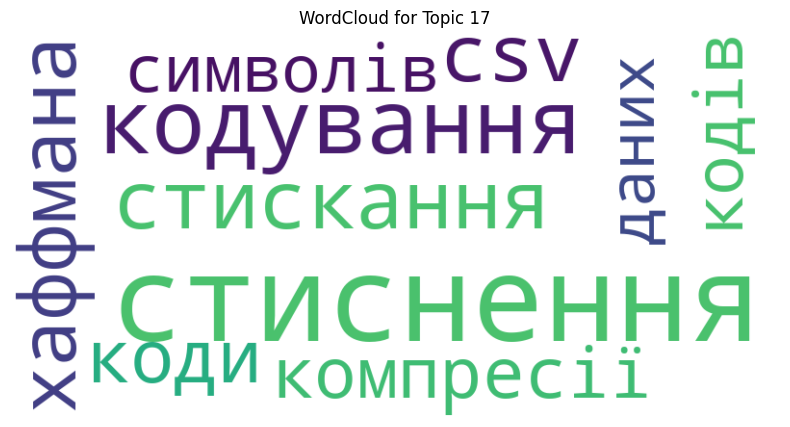

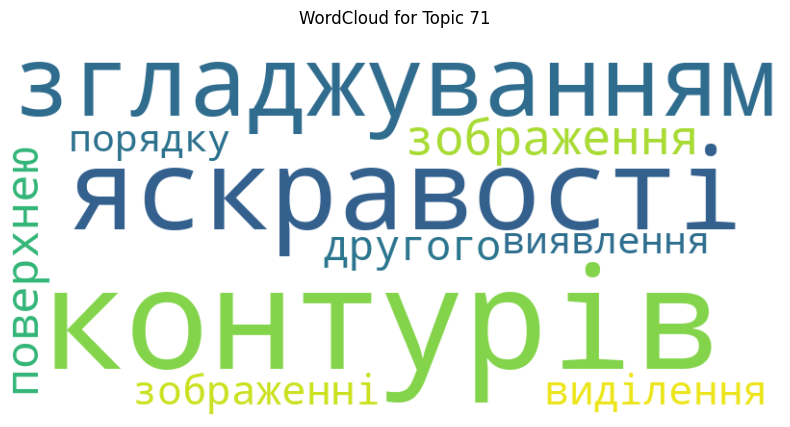

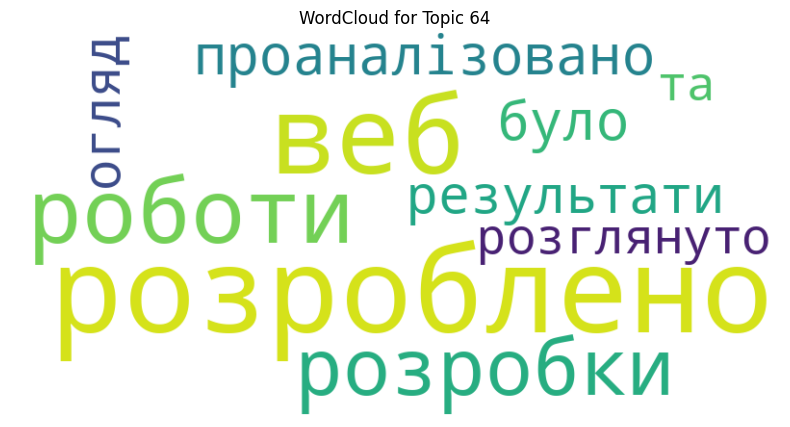

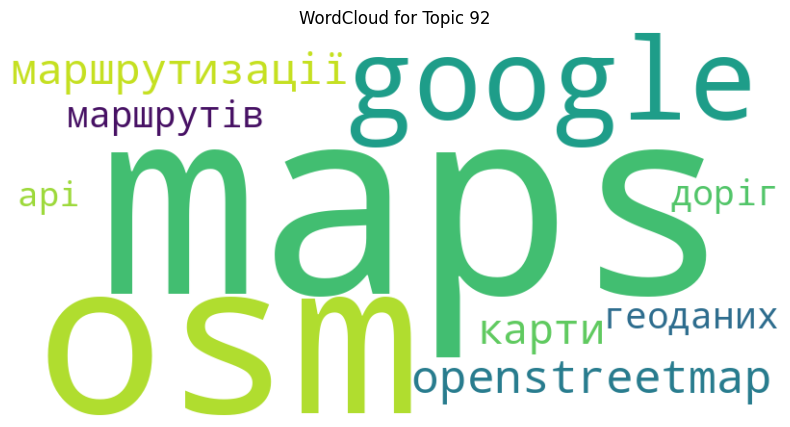

In [ ]:
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt

topics = topic_model.get_topics()

valid_topic_ids = [topic_id for topic_id in topics.keys() if topic_id != -1]
random_topics = random.sample(valid_topic_ids, 10)

for topic_id in random_topics:
    words = topics[topic_id]
    word_freq = {word: weight for word, weight in words}
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for Topic {topic_id}")
    plt.show()


In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize

tokenized_data = [doc.split() for doc in lines_array]


topic_words = []
for topic_id, words in topic_model.get_topics().items():
    if topic_id != -1:
        topic_words.append([word for word, _ in words])

dictionary = Dictionary(tokenized_data)

coherence_model = CoherenceModel(
    topics=topic_words,
    texts=tokenized_data,
    dictionary=dictionary,
    coherence='c_v'
)
coherence_score = coherence_model.get_coherence()

coherence_model = CoherenceModel(
    topics=topic_words,
    texts=tokenized_data,
    dictionary=dictionary,
    coherence='u_mass'
)
u_mass_score = coherence_model.get_coherence()


In [ ]:
print(f"Coherence Score (c_v): {coherence_score:.4f}")
print(f"U_Mass Score: {u_mass_score:.4f}")

Coherence Score (c_v): 0.6371
U_Mass Score: -2.0931
